<a href="https://colab.research.google.com/github/MattYoshida/Magic8Ball/blob/master/asthma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/wstern1234/IE142/main/asthma_disease_data.csv')
data.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
5,5039,21,0,2,0,21.812975,0,0.470044,1.759118,9.549262,...,2.328191,5.898515,1,0,1,0,0,1,0,Dr_Confid
6,5040,45,1,1,1,30.245954,1,9.371784,7.030507,5.746128,...,2.995100,1.701512,1,1,1,0,0,0,0,Dr_Confid
7,5041,26,0,0,1,26.048416,1,8.344096,1.626484,6.431179,...,2.069343,4.012260,1,0,0,1,1,1,0,Dr_Confid
8,5042,49,1,1,2,32.676204,0,2.690256,3.920034,5.843645,...,1.761242,5.190931,1,1,1,1,0,0,0,Dr_Confid
9,5043,45,1,1,1,29.910298,0,2.895720,2.607700,7.234908,...,2.848420,5.771022,1,0,0,0,1,1,0,Dr_Confid


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [ ]:
data.dropna()
data.drop_duplicates(inplace=True)

In [ ]:
data.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge,
5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid,1
6623,74,0,0,1,33.049449,0,6.623081,6.205457,5.812183,0.541376,2.530565,3.606962,0,0,1,0,0,0,2.587923,5.230254,0,0,0,0,1,1,0,Dr_Confid,1
6625,22,1,0,1,37.458931,0,6.875519,6.572507,6.988044,6.425171,3.069180,7.882002,0,0,1,0,0,0,1.486454,1.835264,1,0,0,1,1,0,0,Dr_Confid,1
6626,14,0,0,0,34.743797,1,2.200373,5.237142,8.735889,9.375135,4.351715,9.784246,0,0,0,0,0,0,2.965796,2.758789,1,0,1,1,0,1,0,Dr_Confid,1
6627,75,1,0,1,29.095900,1,5.837363,0.702779,5.160771,9.879160,8.660118,1.396304,0,0,0,0,0,0,1.576001,3.372656,1,1,1,1,1,0,0,Dr_Confid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,35,1,1,1,15.420466,0,6.110344,3.843585,5.110326,6.727460,7.245994,8.778089,0,0,1,0,0,0,3.999608,4.385549,1,1,1,1,1,1,0,Dr_Confid,1
5832,66,0,0,2,22.600303,0,2.452471,8.380381,8.226364,0.310135,3.205765,3.001901,0,0,0,0,0,0,1.045374,3.999870,1,1,0,1,0,1,0,Dr_Confid,1
5833,36,0,0,1,24.735924,0,8.869639,6.800111,4.565343,9.075495,8.912371,0.091395,0,1,1,1,0,0,2.116730,4.156810,0,0,1,0,1,0,0,Dr_Confid,1


In [ ]:
unique_counts = data.nunique()
print(unique_counts)

PatientID                 2392
Age                         75
Gender                       2
Ethnicity                    4
EducationLevel               4
BMI                       2392
Smoking                      2
PhysicalActivity          2392
DietQuality               2392
SleepQuality              2392
PollutionExposure         2392
PollenExposure            2392
DustExposure              2392
PetAllergy                   2
FamilyHistoryAsthma          2
HistoryOfAllergies           2
Eczema                       2
HayFever                     2
GastroesophagealReflux       2
LungFunctionFEV1          2392
LungFunctionFVC           2392
Wheezing                     2
ShortnessOfBreath            2
ChestTightness               2
Coughing                     2
NighttimeSymptoms            2
ExerciseInduced              2
Diagnosis                    2
DoctorInCharge               1
dtype: int64


In [ ]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [ ]:
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [ ]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['Diagnosis'].sort_values(ascending=False)
target_correlation

,Diagnosis
Diagnosis,1.000000
ExerciseInduced,0.053956
LungFunctionFVC,0.029629
Wheezing,0.027197
LungFunctionFEV1,0.023336
GastroesophagealReflux,0.022770
SleepQuality,0.018022
Ethnicity,0.017124
PollenExposure,0.015099
EducationLevel,0.008185


In [ ]:
data = data.drop('Ethnicity', axis=1)

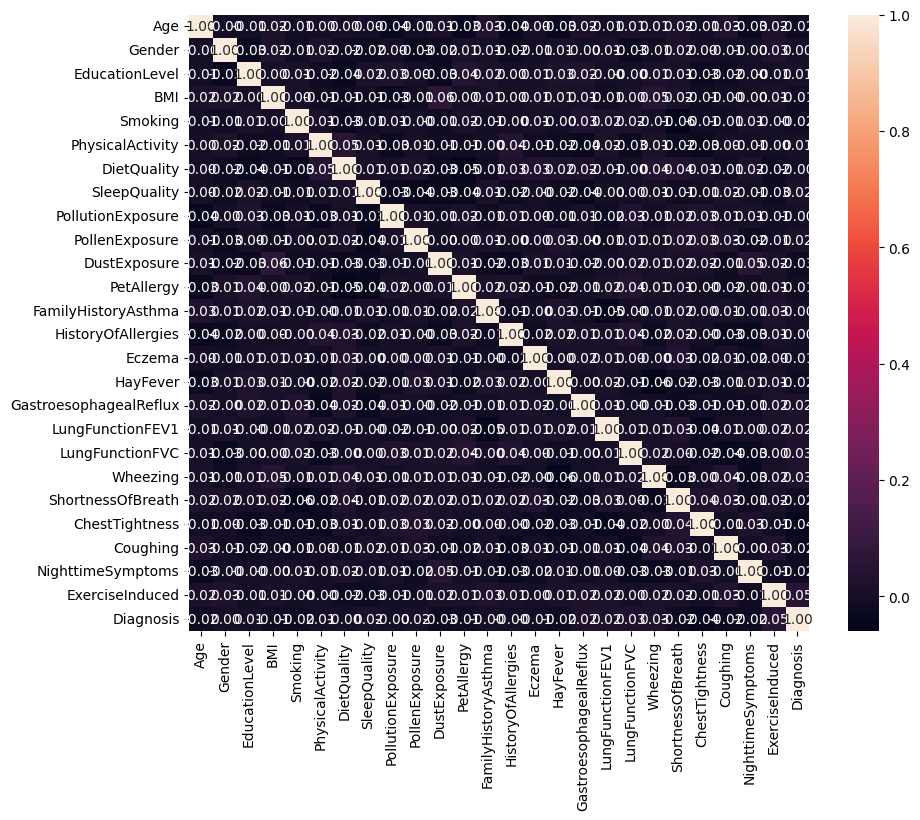

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [ ]:
data['Diagnosis'] = pd.to_numeric(data['Diagnosis'], errors='coerce')

scaler = StandardScaler()
features = data.drop('Diagnosis', axis=1)  # Excluding the target variable
scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Diagnosis'] = data['Diagnosis']  # Adding the target variable back

scaled_data.head()

,Age,Gender,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,0.965740,-0.986710,-1.455673,-1.582769,-0.406355,-1.432099,0.160113,0.971063,0.809355,-0.780866,...,-0.433228,-1.368934,0.920608,-1.214986,-1.000836,0.993333,-1.006711,-1.230954,0.808131,0
1,-0.747054,1.013469,0.771363,-0.623300,-0.406355,0.291269,0.453069,-1.076746,-1.036866,0.810184,...,-0.433228,-0.407132,-1.564256,0.823055,-1.000836,-1.006711,0.993333,0.812378,0.808131,0
2,0.687989,-0.986710,-0.342155,-1.229074,-0.406355,0.581330,1.434458,-0.102976,-1.210374,-1.267434,...,-0.433228,-0.987146,0.983019,0.823055,0.999164,0.993333,-1.006711,0.812378,0.808131,0
3,-0.098970,1.013469,-0.342155,1.565307,-0.406355,-1.256398,0.276233,-1.596880,-1.509757,0.849659,...,-0.433228,0.561114,-1.105641,0.823055,-1.000836,0.993333,0.993333,0.812378,-1.237424,0
4,0.873156,-0.986710,1.884880,-1.105686,-0.406355,-0.154081,-0.651625,1.504976,-1.373822,-0.713717,...,-0.433228,1.070095,-0.516586,0.823055,0.999164,0.993333,-1.006711,-1.230954,0.808131,0


In [ ]:
# Separate features and target variable
X = scaled_data.drop('Diagnosis', axis=1)
y = scaled_data['Diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# def plot_roc_curve(model, X_test, y_test, model_name):
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#     roc_auc = auc(fpr, tpr)

#     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# def plot_confusion_matrix(model, X_test, y_test, model_name):
#     y_pred = model.predict(X_test)
#     cm = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
#     disp.plot(cmap='viridis')
#     plt.title(f'Confusion Matrix: {model_name}')
#     plt.show()

def plot_model_evaluation(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 5))

    # Subplot for ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend(loc="lower right")
    plt.grid()

    # Subplot for Confusion Matrix
    plt.subplot(1, 2, 2)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='viridis', ax=plt.gca())
    plt.title(f'Confusion Matrix: {model_name}')

    plt.tight_layout()
    plt.show()

In [ ]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return (1 - SSE/SST)

def MAE(model, x_test, y_test, y_train):
    y_pred = model.predict(x_test)
    return mean_absolute_error(y_test, y_pred)

def MSE(model, x_test, y_test, y_train):
    y_pred = model.predict(x_test)
    return mean_squared_error(y_test, y_pred)

In [ ]:
#baseline model
print(y_test.value_counts())

#baseline model predicts zero
percentage_zeros = (y_test == 0).mean()
print(f'Accuracy: {percentage_zeros}')

Diagnosis
0    456
1     23
Name: count, dtype: int64
Accuracy: 0.9519832985386222


<Figure size 1000x800 with 0 Axes>

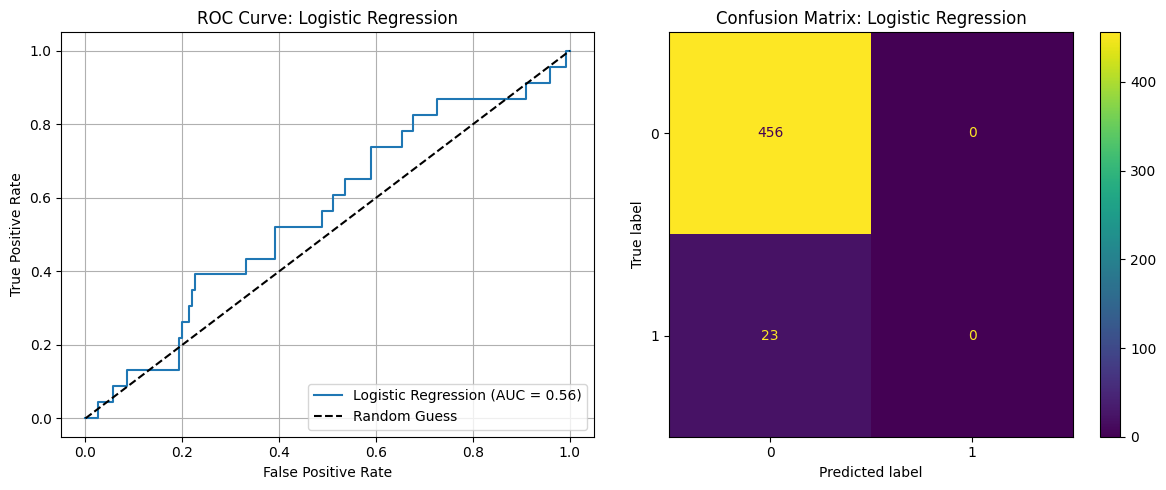


Accuracy: 0.9519832985386222
Logistic Regression Coefficients:
[[-0.13853027 -0.05408226 -0.00863587 -0.09077019 -0.13338822 -0.04769484
  -0.02745039  0.07910566 -0.01031201  0.08692599 -0.12577508 -0.09147272
   0.0216326  -0.05186147 -0.04204601 -0.13629139  0.0455688   0.17383943
   0.17140458  0.15511524 -0.09648962 -0.09892606 -0.11451411 -0.05642984
   0.25057933]]

OSR2:  -0.049913814102305
MAE:  0.04801670146137787
MSE: 0.04801670146137787

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



In [ ]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 8))
plot_model_evaluation(log_reg, X_test, y_test, "Logistic Regression")

print(f"\nAccuracy: {accuracy}")
print(f"Logistic Regression Coefficients:\n{log_reg.coef_}")
print("\nOSR2: ", OSR2(log_reg, X_test, y_test, y_train))
print("MAE: ", MAE(log_reg, X_test, y_test, y_train))
print(f"MSE: {MSE(log_reg, X_test, y_test, y_train)}\n")
print(classification_report(y_test, y_pred))

<Figure size 1000x800 with 0 Axes>

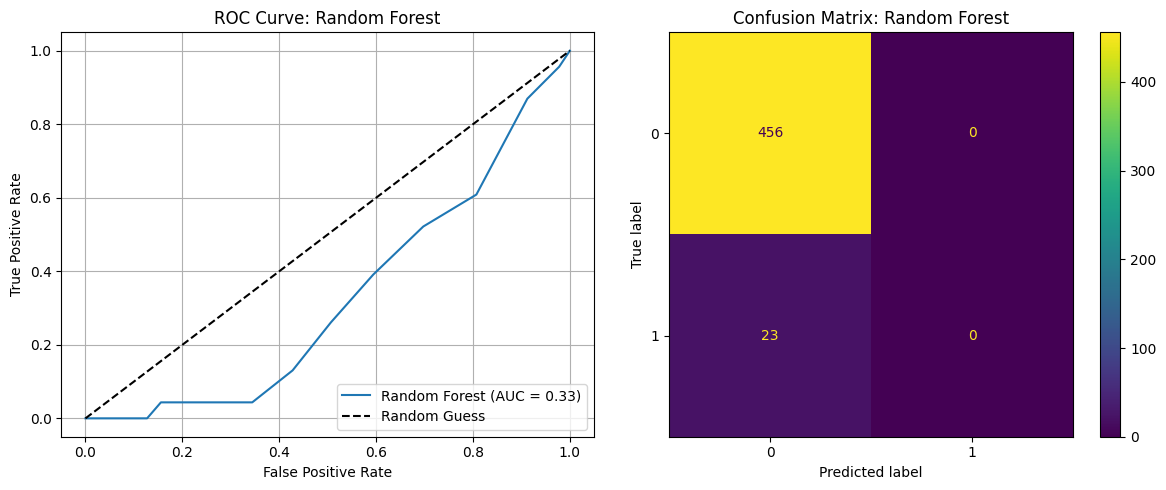


Accuracy: 0.9519832985386222
OSR2:  -0.049913814102305
MAE:  0.04801670146137787
MSE: 0.04801670146137787

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



In [ ]:
rf_classifier = RandomForestClassifier(random_state=6)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
plot_model_evaluation(rf_classifier, X_test, y_test, "Random Forest")

print(f"\nAccuracy: {accuracy_rf}")
print("OSR2: ", OSR2(rf_classifier, X_test, y_test, y_train))
print("MAE: ", MAE(rf_classifier, X_test, y_test, y_train))
print(f"MSE: {MSE(rf_classifier, X_test, y_test, y_train)}\n")
print(classification_report(y_test, y_pred_rf))

<Figure size 1000x800 with 0 Axes>

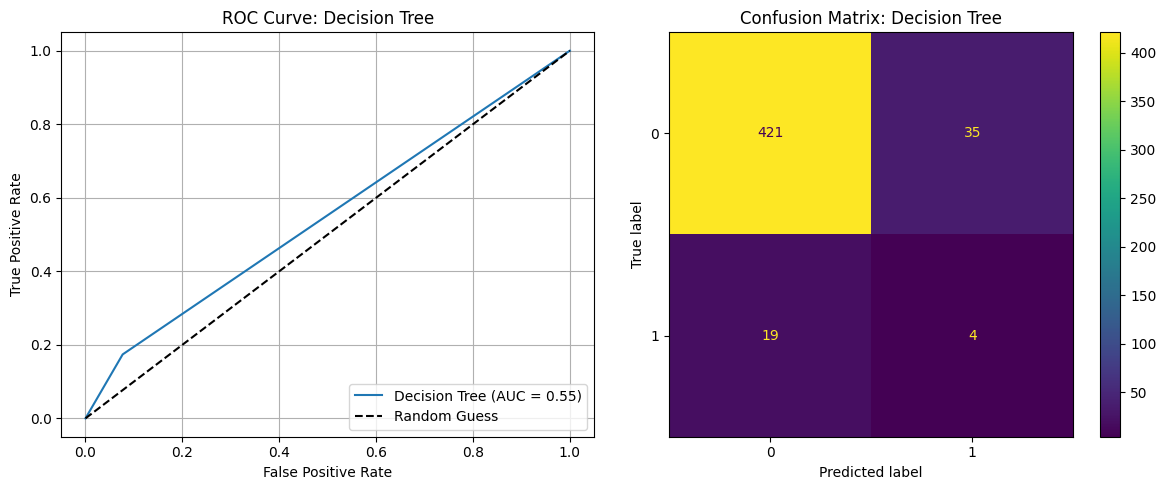


Accuracy: 0.8872651356993737
OSR2:  -1.4650150418054118
MAE:  0.1127348643006263
MSE: 0.1127348643006263

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       456
           1       0.10      0.17      0.13        23

    accuracy                           0.89       479
   macro avg       0.53      0.55      0.53       479
weighted avg       0.92      0.89      0.90       479



In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 8))
plot_model_evaluation(tree_model, X_test, y_test, "Decision Tree")

print(f"\nAccuracy: {accuracy}")
print("OSR2: ", OSR2(tree_model, X_test, y_test, y_train))
print("MAE: ", MAE(tree_model, X_test, y_test, y_train))
print(f"MSE: {MSE(tree_model, X_test, y_test, y_train)}\n")
print(classification_report(y_test, y_pred))

<Figure size 1000x800 with 0 Axes>

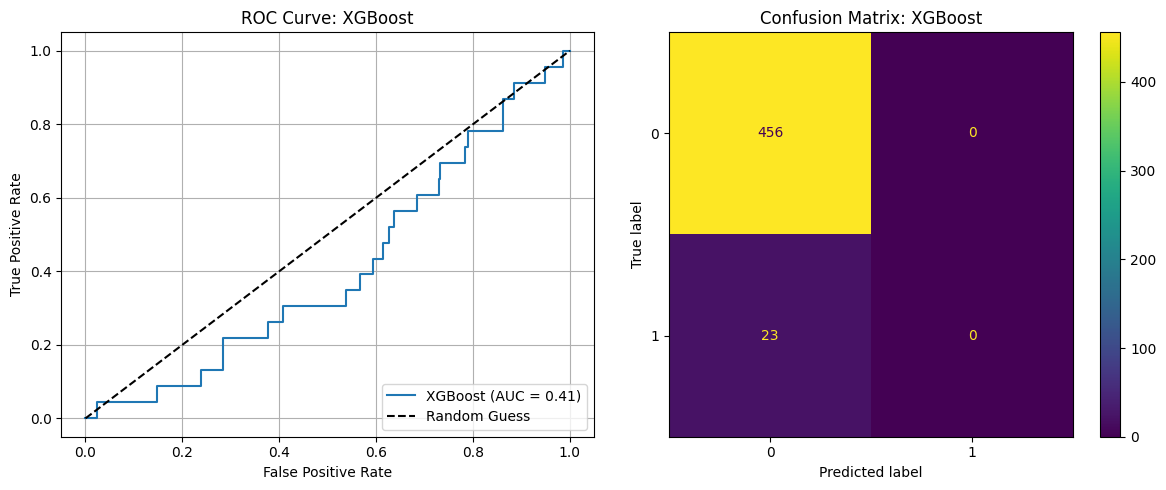


Accuracy: 0.9519832985386222
OSR2:  -0.049913814102305
MAE:  0.04801670146137787
MSE: 0.04801670146137787

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



In [ ]:
clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

clf.fit(X_train, y_train)

y_pred_xgb = clf.predict(X_test)

plt.figure(figsize=(10, 8))
plot_model_evaluation(clf, X_test, y_test, "XGBoost")

accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"\nAccuracy: {accuracy}")
print("OSR2: ", OSR2(clf, X_test, y_test, y_train))
print("MAE: ", MAE(clf, X_test, y_test, y_train))
print(f"MSE: {MSE(clf, X_test, y_test, y_train)}\n")
print(classification_report(y_test, y_pred_xgb))